In [97]:
# imports the various library for the lab
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import osmnx as ox # this line imports osmnx
import networkx as nx # this line imports networkx
import matplotlib.cm as cm
import matplotlib.colors as colors
#from IPython.display import IFrame
#ox.config(log_console=True, use_cache=True)

import sys

#  Does closeness centrality or betweenness centrality affect location of cafe in selected area?

The study area is centered at the Victoria and Albert Museum, within a radius of 2000 meters.

The Victoria and Albert Museum is located in the Borough of Kensington and Chelsea. Kensington and Chelsea borough is an area of wealth and prosperity, with an economy ranking among the top 10% of UK local authorities in the recently published UK Prosperity Index1.

At the centre of the study area are famous museums and the worldwide prestigious college——Imperial College.

## 1. Map of study area

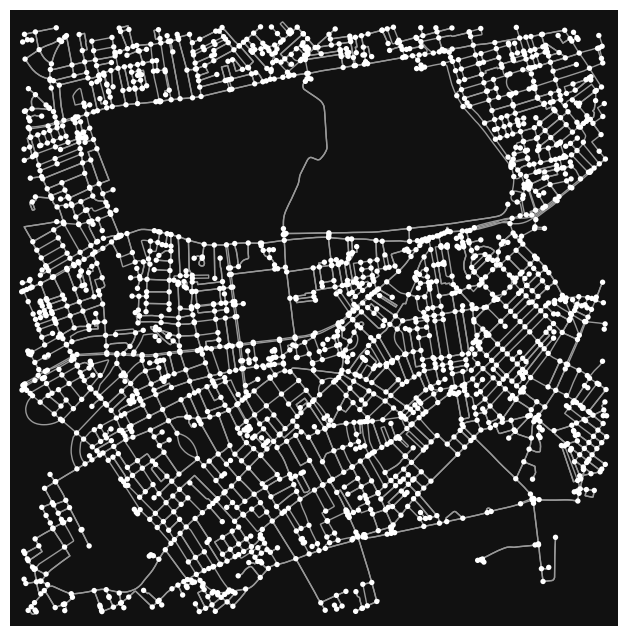

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [33]:
G=ox.graph_from_address('Victoria and Albert Museum, London',dist=2000,network_type='drive')
ox.plot_graph(G)

In [34]:
stats = ox.basic_stats(G)
stats

{'n': 2371,
 'm': 5320,
 'k_avg': 4.4875579924082665,
 'edge_length_total': 380314.6680000023,
 'edge_length_avg': 71.4877195488726,
 'streets_per_node_avg': 2.845212990299452,
 'streets_per_node_counts': {0: 0, 1: 319, 2: 65, 3: 1658, 4: 322, 5: 7},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13454238717840575,
  2: 0.02741459299873471,
  3: 0.6992830029523408,
  4: 0.13580767608603964,
  5: 0.0029523407844791226},
 'intersection_count': 2052,
 'street_length_total': 234734.31400000074,
 'street_segment_count': 3318,
 'street_length_avg': 70.74572453285134,
 'circuity_avg': 1.0453475893295507,
 'self_loop_proportion': 0.0024110910186859553}

# 2. Street network centrality and urban form/land use analysis

In [88]:
tags= tags={'amenity': True, 'highway':True, 'landuse':True, 'building':True, 'waterway': True, 'railway': True}
all_geom=ox.geometries.geometries_from_address('Victoria and Albert Museum, London',tags,dist=2000)
all_geom = all_geom.to_crs(epsg=3857)

C:\Users\86138\AppData\Local\Temp\ipykernel_9764\1899719371.py:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  all_geom=ox.geometries.geometries_from_address('Victoria and Albert Museum, London',tags,dist=2000)


## 2.1 Closeness Centrality and cafe location

In [36]:
# some of the centrality measures are not implemented on multiGraph so first set as diGraph
DG = ox.get_digraph(G)

In [37]:
# Let's calculate edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_cc = nx.closeness_centrality(nx.line_graph(DG))

In [38]:
# set or inscribe the centrality measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG,edge_cc,'cc')
G1 = nx.MultiGraph(DG)

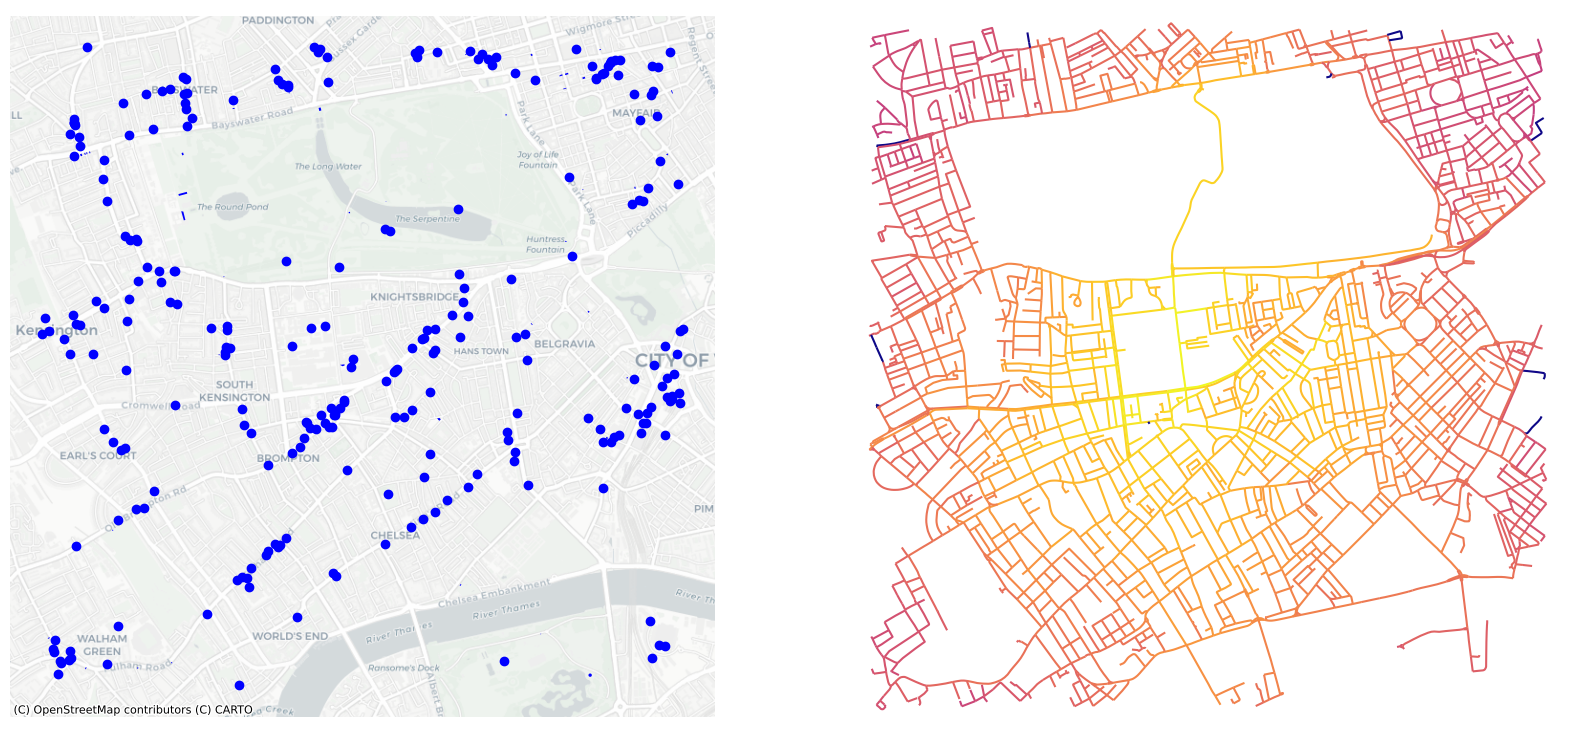

<Figure size 640x480 with 0 Axes>

In [96]:
# Create a figure object that contains two subgraphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Filter out the data of cafe in amenity
cafe_data = all_geom[all_geom['amenity'] == 'cafe']

# Draw the first map (geographical data of cafe)
cafe_data.plot(ax=ax1, color='blue', legend=True)  
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()

# Draw the second graph (geographic data from gdf_edges)
nc = ox.plot.get_edge_colors_by_attr(G1, 'cc', cmap='plasma')
ox.plot_graph(G1, ax=ax2, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
              edge_color=nc, edge_linewidth=1.5, edge_alpha=1)
ax2.set_axis_off()

# Adjust layout
plt.tight_layout()
plt.show()

The left figure represents the locations of cafes (blue dots), while the right one illustrates the Closeness Centrality within the study area.

We can see the area that is the most central here is near IC and V&A Museum from the right graph. 

According to the left figure, along the southeast-oriented road to the south of the museum, cafes are concentrated. This roughly aligns with Closeness Centrality. However, possibly due to social factors, we observe that the road between the school and museum, despite having high Closeness Centrality, lacks cafe distribution. Additionally, there is a dense cluster of cafes around parks, likely driven by the demand from park visitors.

## 2.2 Betweenness Centrality and cafe location

In [40]:
# Let's calculate edge betweeness centrality: please stop if this takes too long.
edge_bc = nx.betweenness_centrality(nx.line_graph(DG))

In [41]:
# set or inscribe the centrality measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG,edge_bc,'bc')
G1 = nx.MultiGraph(DG)

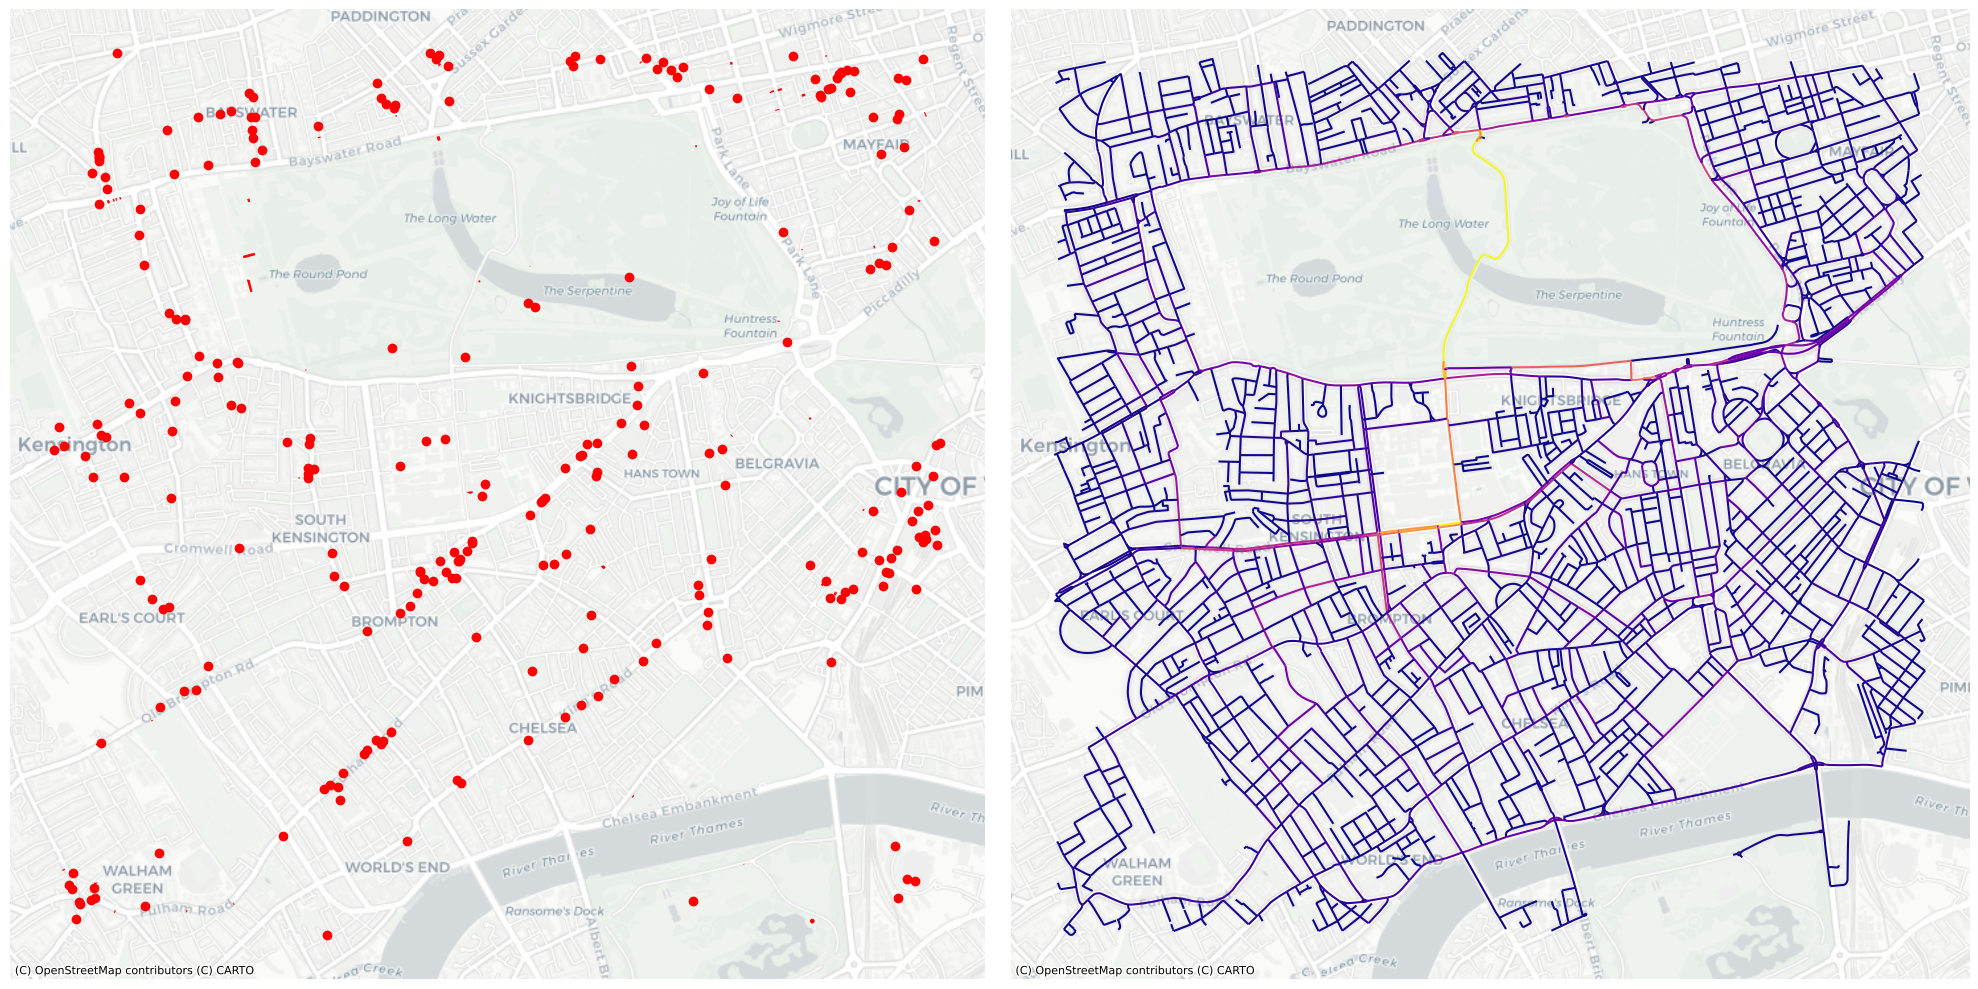

In [93]:
# Create a figure object that contains two subgraphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Filter out the data of cafe in amenity
cafe_data = all_geom[all_geom['amenity'] == 'cafe']

# Draw the first map (geographical data of cafe)
cafe_data.plot(ax=ax1, color='red', legend=False)  # 修改颜色，根据需要调整
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)
ax1.set_axis_off()

# Draw the second graph (geographic data from gdf_edges)
gdf_edges.plot('bc', cmap='plasma', ax=ax2)
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron)
ax2.set_axis_off()

# Adjust layout
plt.tight_layout()
plt.show()

The left figure represents the locations of cafes (blue dots), while the right one illustrates the Betweenness Centrality within the study area.

or this small graph (right) in London, the street between IC and V&A Museum seems to have the highest betweenness centrality. This result suggests the particular street has a higher probability of being traversed based on purely the configuration of the grid.

Visually, Betweenness Centrality has more impact on the locations of cafes. For instance, the roads where cafes near the museum and those around the park are located exhibit relatively high Betweenness Centrality.